In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
LEARNING_RATE = 0.1
ITER_NUM = 10_000
DISPLAY_TIMES = ITER_NUM / 5

## 1. Load Data

In [3]:
# Data for the and operation.
and_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
and_outputs = [
    [0],
    [0],
    [0],
    [1]
]

In [4]:
# Training set.
and_train_examples = torch.tensor(and_inputs, dtype=torch.float)
and_train_labels = torch.tensor(and_outputs, dtype=torch.float)

# Test set.
and_test_examples = torch.tensor(and_inputs, dtype=torch.float)
and_test_labels = torch.tensor(and_outputs, dtype=torch.float)

## 2. Build a Model

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.linear = nn.Linear(2, 1)
        
    def forward(self, inputs):
        z1 = self.linear(inputs)
        a1 = torch.sigmoid(z1)  # (i)

        return a1

<font color=red>
    (i) Activation func is necessary. sign() is used in the original perceptron.
</font>

In [6]:
net = Net()

## 3. Criterion and Optimizer

In [7]:
# Criterion.
criterion = nn.MSELoss()

In [8]:
# Optimizer.
optim = optim.SGD(params=net.parameters(), lr=LEARNING_RATE)

## 4. Train the Model

In [9]:
running_loss = 0.0
for i in range(ITER_NUM):
    optim.zero_grad()
    
    # Forward.
    outputs = net(and_train_examples)
    loss = criterion(outputs, and_train_labels)

    # Backward.
    loss.backward()
    
    # Updates params.
    optim.step()
    
    running_loss += loss
    if i % DISPLAY_TIMES == DISPLAY_TIMES - 1:
        print(f"iteration: {i:>6}, loss: {loss / DISPLAY_TIMES:.6f}")
        
        running_loss = 0.0

iteration:   1999, loss: 0.000017
iteration:   3999, loss: 0.000008
iteration:   5999, loss: 0.000005
iteration:   7999, loss: 0.000004
iteration:   9999, loss: 0.000003


<font color=red>
    (i) Check grad: 
    <br/>
    net.linear.weight.grad  # `weight` has multiple values
    <br/>
    net.linear.bias.grad
</font>

In [10]:
params = list(net.parameters())
theta_1 = params[0][0][0]
theta_2 = params[0][0][1]
bias = params[1][0]

print(f"theta1 = {theta_1:.2f}, theta2 = {theta_2:.2f}, bias = {bias:.2f}")

theta1 = 4.63, theta2 = 4.63, bias = -7.05


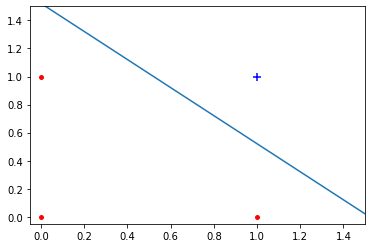

In [26]:
import matplotlib.pyplot as plt

def y(theta_1, theta_2, bias, x1):
    return ((-theta_1 * x1 - bias) / (theta_2))

x = [i for i in range(3)]
y = [y(theta_1, theta_2, bias, x) for x in range(3)]

plt.scatter(x=[0, 0, 1], y=[0, 1, 0], s=60, marker='.', c='r')
plt.scatter(x=[1], y=[1], s=60, marker='+', c='b')
plt.plot(x, y)
plt.axis([-0.05, 1.5, -0.05, 1.5])
plt.show()

<font color=red>
    (i) y = wx + b in pytorch, not -b
</font>

## 5. Test the Model

In [12]:
outputs = net(and_test_examples)
print(outputs)

tensor([[8.6947e-04],
        [8.2119e-02],
        [8.2119e-02],
        [9.0194e-01]], grad_fn=<SigmoidBackward>)
